In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd

# Data Wrangling

In [ ]:
netdata = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netdata.head(5)

In [48]:
netdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Data Preprocessing

In [57]:
# number and percentage of missing values according to columns
{col: [netdata[col].isnull().sum(), f'% {np.round(np.mean(netdata[col].isnull()*100), 3)}'
      ] for col in netdata.columns if netdata[col].isnull().any()}

{'director': [2634, '% 29.908'],
 'cast': [825, '% 9.368'],
 'country': [831, '% 9.436'],
 'date_added': [10, '% 0.114'],
 'rating': [4, '% 0.045'],
 'duration': [3, '% 0.034']}

<Axes: >

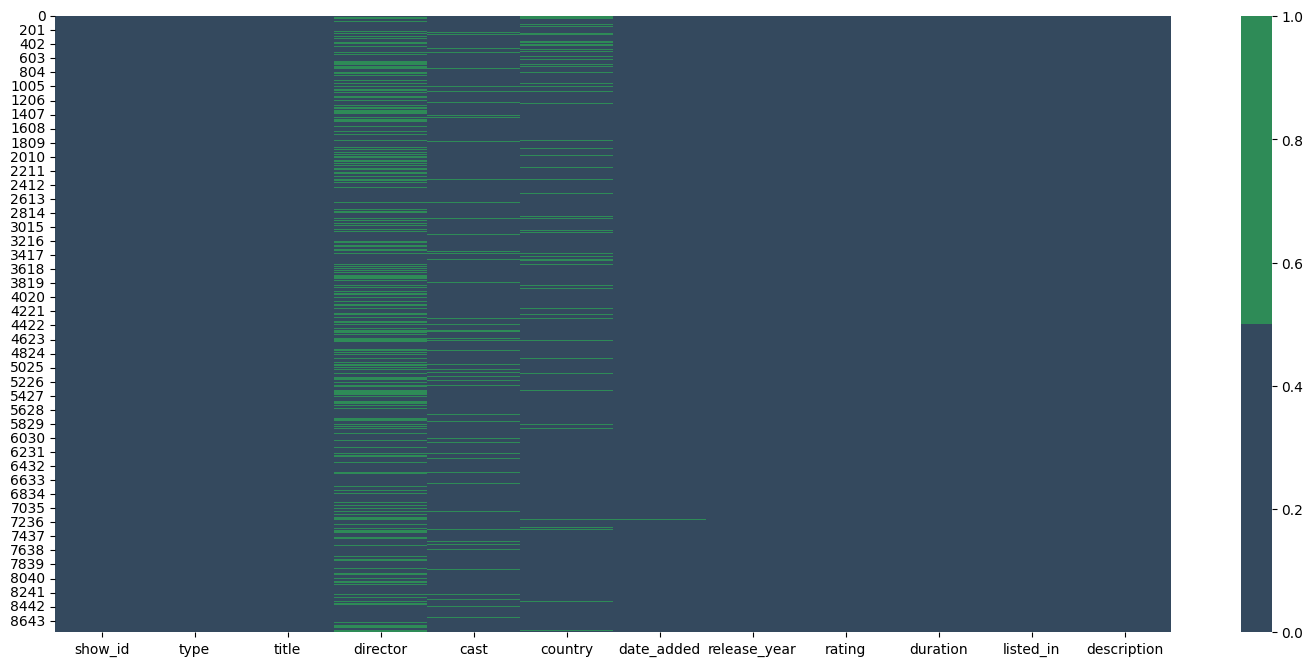

In [54]:
import seaborn as sns
import  matplotlib.pyplot as plt
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen'] 
sns.heatmap(netdata.isnull(), cmap=sns.color_palette(colours))

#  Descriptive Analytics 
* Visualization

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
chart_colors = ['#5ca02c', '#8c674b', '#32533D', '#1f77b5',  '#FF9911', '#d1d6d5', '#333513', '#FFFFFF']
duration = netdata['duration'].value_counts()
fig = px.histogram(duration, duration.index, duration.values, 
                   template= "plotly_dark",
                   color_discrete_sequence= chart_colors, 
                   width = 1000, height = 800, 
                   title = 'Popular shows'
                  )
fig.update_layout(bargap=0.1)

fig.show()

In [ ]:
tvshows = netdata[netdata['type'] == 'TV Show'].copy()
movies = netdata[netdata['type'] == 'Movie'].copy()
fig = px.histogram(netdata, 'type', 
                   template= "plotly_dark",
                   color_discrete_sequence= chart_colors, 
                   width = 800, height = 400,
                   text_auto=True, 
                   title = 'Total number of tv and movies show'
                  )

fig.show()

In [ ]:
tv_shows = tvshows[['date_added']]
tv_shows = tv_shows.dropna()
tv_shows['month'] = tv_shows['date_added'].apply(lambda x: x.split(' ')[0])
tv_shows['year'] = tv_shows['date_added'].apply(lambda x: x.split(', ')[1])
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_shows_matrix =  tv_shows.groupby('year')['month'].value_counts().unstack()[months_list].fillna(0).T
tv_shows_matrix
fig = px.imshow(tv_shows_matrix, 
                template= "plotly_dark",
                text_auto=True,
                width = 800, height = 800, 
                title = 'Release matrix')
fig.show()

In [ ]:
fig = px.histogram(tv_shows,  'year', 
             template= "plotly_dark",
             color_discrete_sequence= ['#F9139A'],
             width = 800, height = 500,
             text_auto=True,
             title = 'Number of released TV Shows yearwise'
            )

fig.show()

In [ ]:
tvshow_rating = tvshows['rating'].reset_index()
tvshow_rating = tvshow_rating.groupby('rating').count().reset_index().sort_values(by = 'index', ascending=False)
fig = px.bar(tvshow_rating,  'rating', 'index', 
             template= "plotly_dark",
             color_discrete_sequence= ['#F9139A'],
             width = 800, height = 500,
             text_auto=True,
             title = 'The most frequent tv shows rating wise'
            )

fig.show()

In [ ]:
countries_list = tvshows['country']
countries_list.fillna('No_info', inplace = True)
countries_list.isna().sum()


# unsplitting fields with several countries

contry_dict = {}

c = list(countries_list)
for i in c:
    i = i.replace(' ', '')
    i = i.split(',')
        
    for j in i:
        if j in list(contry_dict.keys()):
            #print(contry_dict)
            contry_dict[j] += 1
           # print(contry_dict)
        else:
            contry_dict[j] = 1
           # print(contry_dict)



countries_sorted_list = sorted(contry_dict.items(), key = lambda item: contry_dict[item[0]], reverse = True)
countries_sorted_list = countries_sorted_list[:10]

#finding contries names

states = [i for i, value in countries_sorted_list]

qty = [value for i, value in countries_sorted_list]

#######################
fig = px.pie(values = qty, names = states,
             template= "plotly_dark", 
             title = 'Top 10 countries ', 
             width = 800, height = 500, 
             color_discrete_sequence=  chart_colors)


fig.show()

In [32]:
genre = tvshows['listed_in']
genre_list = []

for i in genre:
    i = i.split(',')
    for j in i:
        genre_list.append(' '.join(j.split())) # merging all values into one list and deleting extra spaces
from collections import Counter

genre = Counter(genre_list)
genre = sorted(genre.items(), key= lambda item: genre[item[0]], reverse = True)
genre = genre[:10]
value = [value for value, value in genre] # extracting values
name = [name for name, value in genre] # extracting keys
fig = px.pie(values = value, names = name,
             template= "plotly_dark", 
             title = 'Top 10 genres', 
             width = 800, height = 500, 
             color_discrete_sequence=  chart_colors)


fig.show()

In [34]:
movies_release = movies[['date_added']]
movies_release_date = movies_release.dropna()
movies_release_date['month'] = movies_release_date['date_added'].apply(lambda x: x.split(' ')[0])
movies_release_date['year'] = movies_release_date['date_added'].apply(lambda x: x.split(', ')[1])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
movies_release_matrix =  movies_release_date.groupby('year')['month'].value_counts().unstack()[months].fillna(0).T
fig = px.imshow(movies_release_matrix, 
                template= "plotly_dark",
                text_auto=True,
                width = 800, height = 800, 
                title = 'Movie release heatmap (Month wise)')
fig.show()

#  Predictive Analytics 
Recommendation system using NLP

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
# Fill missing descriptions with an empty string
movies['description'] = movies['description'].fillna('')

# Check for any remaining missing values in the 'description' column
missing_descriptions = movies['description'].isna().sum()

# Display the first three descriptions
sample_descriptions = movies['description'].head(3)

# Initialize TF-IDF Vectorizer with English stop words
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the descriptions into TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['description'])

# Print results for verification
print(f'Missing descriptions: {missing_descriptions}')
print('Sample descriptions:')
print(sample_descriptions)

Missing descriptions: 0
Sample descriptions:
0    As her father nears the end of his life, filmm...
6    Equestria's divided. But a bright-eyed hero be...
7    On a photo shoot in Ghana, an American model s...
Name: description, dtype: object


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix for the TF-IDF matrix
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a Series to map movie titles to their indices, ensuring uniqueness
indexes = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [41]:
import pandas as pd

# Convert cosine similarity matrix to DataFrame
sim_df=similarity_matrix
sim_df = pd.DataFrame(sim_df) #changed to indexes 'cos_sim'
sim_df.columns = indexes.index
sim_df['title'] = indexes.index
sim_df.set_index('title', inplace=True)

# Function to predict movie recommendations based on cosine similarity
def netflix_recommendation(title, sim_matrix=sim_df):
    idx = indexes[title]
    sim_scores = list(enumerate(sim_matrix.loc[title]))
    
    # Sort similarity scores in descending order and select top 10 (excluding the first one)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    
    # Get the indexes of the top 10 similar movies
    movie_indexes = [i[0] for i in sim_scores]
    
    return movies['title'].iloc[movie_indexes]

# Example usage:
# recommended_movies = netflix_recommendation('Some Movie Title')
# print(recommended_movies)

In [44]:
#calling function
netflix_recommendation('A New York Christmas Wedding') #replace any title but that should be in dataset

sim_df.loc[(sim_df.index == 'A New York Christmas Wedding') | (sim_df.index == 'Alelí'), 
               ['A New York Christmas Wedding', 'Alelí']]

title,A New York Christmas Wedding,Alelí
title,,
A New York Christmas Wedding,1.000000,0.054501
Alelí,0.054501,1.000000
